In [131]:
import librosa

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

import IPython.display as ipd

from sklearn.preprocessing import StandardScaler
import os

from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

In [99]:
def get_mfcc_features(audio_array, sample_rate, scaler, n_mfcc):    
    mfcc_matrix = librosa.feature.mfcc(audio_array, sr=sample_rate, n_mfcc=n_mfcc).T
    mfcc_matrix_scaled = scaler.fit_transform(mfcc_matrix)
    mfcc_features = mfcc_matrix_scaled.reshape(1,-1)
    return mfcc_features

In [97]:
# Count total number of songs by genre in the library
rootdir = 'C:\\Users\\Rohan Bapat\\Documents\\Classes\\SYS 6016\\Final project\\Songs'

num_songs = []
for subdir, dirs, files in os.walk(rootdir):
    genre_songs = 0
    for file in files:
        genre_songs += 1
    num_songs.append(genre_songs)

genre_list = os.listdir(rootdir)

genre_song_count ={}
genre_song_count = dict(zip(genre_list,num_songs[1:]))
total_songs = sum(genre_song_count.values())

print(genre_song_count)
print('\ntotal number of songs: ', total_songs)

{'alternative': 145, 'blues': 120, 'electronic': 113, 'folkcountry': 222, 'funksoulrnb': 47, 'jazz': 319, 'pop': 116, 'raphiphop': 300, 'rock': 504}

total number of songs:  1886


In [129]:
scaler = StandardScaler()

n_mfcc = 12
X = np.zeros([total_songs,5000])

i=0

for subdir, dirs, files in os.walk(rootdir):  
    print(subdir)
    for file in files:
        audio_file = os.path.join(subdir, file)  
        audio_array, sample_rate = librosa.load(audio_file)
        mfcc = get_mfcc_features(audio_array, sample_rate , scaler, n_mfcc)
        X[i,:] = mfcc[0,:5000]
        i+=1 

C:\Users\Rohan Bapat\Documents\Classes\SYS 6016\Final project\Songs
C:\Users\Rohan Bapat\Documents\Classes\SYS 6016\Final project\Songs\alternative
C:\Users\Rohan Bapat\Documents\Classes\SYS 6016\Final project\Songs\blues
C:\Users\Rohan Bapat\Documents\Classes\SYS 6016\Final project\Songs\electronic
C:\Users\Rohan Bapat\Documents\Classes\SYS 6016\Final project\Songs\folkcountry
C:\Users\Rohan Bapat\Documents\Classes\SYS 6016\Final project\Songs\funksoulrnb
C:\Users\Rohan Bapat\Documents\Classes\SYS 6016\Final project\Songs\jazz
C:\Users\Rohan Bapat\Documents\Classes\SYS 6016\Final project\Songs\pop
C:\Users\Rohan Bapat\Documents\Classes\SYS 6016\Final project\Songs\raphiphop
C:\Users\Rohan Bapat\Documents\Classes\SYS 6016\Final project\Songs\rock


In [132]:
genre_nm = []
for key in list(genre_song_count.keys()):
    genre_nm.extend(list(np.repeat(key, genre_song_count[key])))
    
genre_nm = pd.Series(genre_nm)
y = pd.get_dummies(genre_nm)

In [164]:
train_test_split = 0.9
train_index = np.random.choice(X.shape[0], int(train_test_split*X.shape[0]))
train_X = X[train_index,:]
test_X = np.delete(X, train_index, axis = 0)
train_y = y.loc[train_index,:]
test_y = y.drop(train_index, axis=0)

In [165]:
activation_fn = 'relu'
learning_rate = 0.001
hidden_layers = (400,400)
optimizer = 'adam'

mlp = MLPClassifier(activation = activation_fn, alpha=learning_rate,
                    hidden_layer_sizes=hidden_layers, solver = optimizer, epsilon = 1e-05)

mlp.fit(train_X, train_y)

predictions = mlp.predict(test_X)

In [166]:
predictions_prob = mlp.predict_proba(test_X)

predicted_genre_id = np.argmax(predictions_prob,axis =1)
predicted_genre = [genre_list[i] for i in predicted_genre_id]

actual_genre = test_y.idxmax(axis=1)

print(classification_report(actual_genre,predicted_genre, target_names=genre_list))

             precision    recall  f1-score   support

alternative       0.06      0.05      0.05        63
      blues       0.06      0.05      0.05        43
 electronic       0.04      0.03      0.03        40
folkcountry       0.17      0.16      0.17        92
funksoulrnb       0.00      0.00      0.00        23
       jazz       0.17      0.22      0.19       116
        pop       0.08      0.04      0.06        45
  raphiphop       0.33      0.23      0.27       132
       rock       0.33      0.49      0.39       209

avg / total       0.21      0.24      0.22       763



c:\users\rohan bapat\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Visualize audio

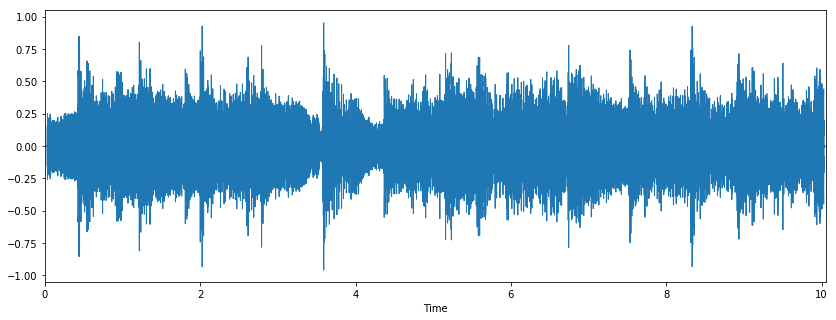

In [7]:
# Wave plot
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio_array, sr=sample_rate)

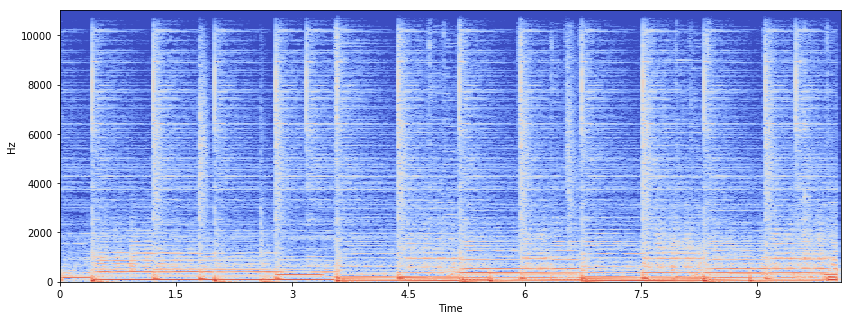

In [8]:
# Spectrogram
X = librosa.stft(audio_array)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))

librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')

Play an audio file <br>
ipd.Audio(audio_array, rate=sample_rate)

In [39]:
a = mfcc_brahms.reshape(1,-1)

In [33]:
import numpy as np

In [42]:
np.append(a,a,axis=0)

array([[-128.61857693,   72.68174954,   -3.20604774, ...,   20.86613331,
          13.01431191,    6.17989742],
       [-128.61857693,   72.68174954,   -3.20604774, ...,   20.86613331,
          13.01431191,    6.17989742]])

In [55]:
mfcc_brahms.shape

(434, 12)